## Final Project Submission

Please fill out:
* Student name: **HARRIET NGOMO**
* Student pace: **part time**
* Scheduled project review date/time: 
* Instructor name: **DIANA MONGINA**
* Blog post URL:


# **Aviation Risk Analysis for Business Expansion** 

## **1. Introduction**
### **1.1 Project Overview**  
- As our company expands into the aviation industry to diversify its portfolio, we face the challenge of entering a new sector with limited expertise. To ensure success, we must identify the lowest-risk aircraft for commercial and private operations. This analysis aims to evaluate aircraft risks, provide actionable insights, and guide the aviation division head in making informed purchasing decisions. 

### **1.2 Business Problem**  
- To mitigate potential risks and ensure informed investment decisions, we must analyze aviation accident data to determine which aircrafts have the **lowest risk levels**. This analysis will help the head of the new aviation division make data-driven decisions on aircraft selection.

### **1.3 Objectives**  

#### **Main Objectives:**  
1. **To analyze aviation accident data to identify aircraft types with the lowest risk levels.**  
2. **To provide data-driven insights that will guide the company's investment decisions in the aviation industry.**  

#### **Specific Objective:**  
- **To determine key factors contributing to aviation accidents and assess their impact on different aircraft types.**  

### **1.4 Expected Outcomes**  
By the end of this analysis, we will generate **data-driven insights** that will help the company:  
- Minimize financial and operational risks in the aviation industry.  
- Select aircraft with a strong safety record.  
- Make informed strategic decisions for commercial and private aviation operations.  

## **2. Business Understanding**
- To provide a data-driven approach to aircraft selection, we need to analyze aviation accident data from the **National   Transportation Safety Board (NTSB)**. The analysis will focus on accident trends, aircraft safety records, and risk factors to generate actionable business recommendations.


## **3. Data Understanding**
The dataset contains aviation accident data from **1962 to 2023**, with 31 columns detailing various aspects of each incident. It includes information on:

- Aircraft Information: Make, model, number of engines, engine type, and whether the aircraft was amateur-built.

- Accident Details: Date, location (city/state/country), phase of flight, weather conditions, and accident severity.

- Operational Factors: Purpose of flight (e.g., personal, commercial, cargo), regulatory information (FAR description), and air carrier details.

- Injury & Damage Information: Number of fatalities, serious injuries, minor injuries, and uninjured passengers.
- Report Information: Investigation type, accident number, report status, and publication date.

To gain insights, we will:
- Load and inspect the dataset structure.
- Identify missing values and determine how to handle them.
- Explore key variables related to aircraft risk assessment

# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the dataset

In [2]:
df = pd.read_csv('AviationData.csv',encoding='latin1',low_memory=False)

df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


# Inspect dataset structure

In [3]:
# Display first five rows
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
# Display last 5 rows
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [5]:
# Access the column labels
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [6]:
# Access the row labels
df.index

RangeIndex(start=0, stop=88889, step=1)

In [7]:
# Check the metadata of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [8]:
# Shape of the DataFrame
df.shape

(88889, 31)

In [9]:
# Datatype of all columns in the DataFrame
df.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

In [10]:
# Statistical summary of the DataFrame

df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


## 4.**Data Preparation**
### **4.1 Data Cleaning**  

- To ensure the dataset is clean and ready for analysis, we will:

- Handle missing values appropriately


In [11]:
# Check if the dataset has missing values
df.isna().any()

Event.Id                  False
Investigation.Type        False
Accident.Number           False
Event.Date                False
Location                   True
Country                    True
Latitude                   True
Longitude                  True
Airport.Code               True
Airport.Name               True
Injury.Severity            True
Aircraft.damage            True
Aircraft.Category          True
Registration.Number        True
Make                       True
Model                      True
Amateur.Built              True
Number.of.Engines          True
Engine.Type                True
FAR.Description            True
Schedule                   True
Purpose.of.flight          True
Air.carrier                True
Total.Fatal.Injuries       True
Total.Serious.Injuries     True
Total.Minor.Injuries       True
Total.Uninjured            True
Weather.Condition          True
Broad.phase.of.flight      True
Report.Status              True
Publication.Date           True
dtype: b

In [12]:
# Sum of the missing values and sort them in descending order
df.isna().sum().sort_values(ascending = False)

Schedule                  76307
Air.carrier               72241
FAR.Description           56866
Aircraft.Category         56602
Longitude                 54516
Latitude                  54507
Airport.Code              38640
Airport.Name              36099
Broad.phase.of.flight     27165
Publication.Date          13771
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Fatal.Injuries      11401
Engine.Type                7077
Report.Status              6381
Purpose.of.flight          6192
Number.of.Engines          6084
Total.Uninjured            5912
Weather.Condition          4492
Aircraft.damage            3194
Registration.Number        1317
Injury.Severity            1000
Country                     226
Amateur.Built               102
Model                        92
Make                         63
Location                     52
Event.Date                    0
Accident.Number               0
Investigation.Type            0
Event.Id                      0
dtype: i

#### Before deciding to drop or fill values, calculate the percentage of missing values per column

In [13]:
# Check Missing Value Percentages
missing_percent = (df.isnull().sum() / len(df)) * 100
print(missing_percent.sort_values(ascending=False))


Schedule                  85.845268
Air.carrier               81.271023
FAR.Description           63.974170
Aircraft.Category         63.677170
Longitude                 61.330423
Latitude                  61.320298
Airport.Code              43.469946
Airport.Name              40.611324
Broad.phase.of.flight     30.560587
Publication.Date          15.492356
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Fatal.Injuries      12.826109
Engine.Type                7.961615
Report.Status              7.178616
Purpose.of.flight          6.965991
Number.of.Engines          6.844491
Total.Uninjured            6.650992
Weather.Condition          5.053494
Aircraft.damage            3.593246
Registration.Number        1.481623
Injury.Severity            1.124999
Country                    0.254250
Amateur.Built              0.114750
Model                      0.103500
Make                       0.070875
Location                   0.058500
Event.Date                 0

In [14]:
# Drop columns whose  missing_percent is greater than 60 %
df_cleaned = df.drop(columns = ['Schedule','Air.carrier','FAR.Description','Aircraft.Category','Longitude','Latitude'])
df_cleaned

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,Fatal(2),Destroyed,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,Fatal(4),Destroyed,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,NaN,NaN,Fatal(3),Destroyed,...,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,Fatal(2),Destroyed,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,Fatal(1),Destroyed,...,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,Minor,NaN,...,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,PAN,PAYSON,Non-Fatal,Substantial,...,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [15]:
# Fill categorical columns with appropriate values
df_cleaned["Broad.phase.of.flight"].fillna("Unknown", inplace=True)
df_cleaned["Publication.Date"].fillna("Not Published", inplace=True)
df_cleaned["Weather.Condition"].fillna("Unknown", inplace=True)
df_cleaned["Airport.Code"].fillna("Unknown", inplace=True)
df_cleaned["Airport.Name"].fillna("Unknown", inplace=True)
df_cleaned["Location"].fillna("Unknown", inplace=True)
df_cleaned["Country"].fillna("Unknown", inplace=True)
df_cleaned["Aircraft.damage"].fillna("Unknown", inplace=True)
df_cleaned["Registration.Number"].fillna("Unknown", inplace=True)
df_cleaned["Make"].fillna("Unknown", inplace=True)
df_cleaned["Model"].fillna("Unknown", inplace=True)
df_cleaned["Amateur.Built"].fillna("No", inplace=True)
df_cleaned["Purpose.of.flight"].fillna("Unknown", inplace=True)
df_cleaned["Report.Status"].fillna("Not Available", inplace=True)

# Fill numerical columns with 0
df_cleaned["Total.Fatal.Injuries"].fillna(0, inplace=True)
df_cleaned["Total.Serious.Injuries"].fillna(0, inplace=True)
df_cleaned["Total.Minor.Injuries"].fillna(0, inplace=True)
df_cleaned["Total.Uninjured"].fillna(0, inplace=True)

# Use mode (most frequent value) for Engine Type
df_cleaned["Engine.Type"].fillna(df_cleaned["Engine.Type"].mode()[0], inplace=True)

# Use median for Number of Engines (if it's numeric)
df_cleaned["Number.of.Engines"] = pd.to_numeric(df_cleaned["Number.of.Engines"], errors="coerce")
df_cleaned["Number.of.Engines"].fillna(df_cleaned["Number.of.Engines"].median(), inplace=True)


# Classify Injury Severity based on injury counts
df_cleaned["Injury.Severity"] = df_cleaned.apply(
    lambda row: "None" if row["Total.Fatal.Injuries"] == 0 and 
                           row["Total.Serious.Injuries"] == 0 and 
                           row["Total.Minor.Injuries"] == 0 else "Unknown", axis=1)

# Confirm cleaning
print(df_cleaned.isnull().sum().sort_values(ascending=False))


Publication.Date          0
Make                      0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Airport.Code              0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Registration.Number       0
Model                     0
Report.Status             0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Event.Id                  0
dtype: int64


## 5.**Visualization Insights**

**1. Accident Trends Over Time (Line Plot)**
- Objective: Identify trends in aviation accidents to understand risk fluctuations.

In [16]:
df_cleaned["Event.Date"]

0        1948-10-24
1        1962-07-19
2        1974-08-30
3        1977-06-19
4        1979-08-02
            ...    
88884    2022-12-26
88885    2022-12-26
88886    2022-12-26
88887    2022-12-26
88888    2022-12-29
Name: Event.Date, Length: 88889, dtype: object

In [17]:
df_cleaned["Event.Date"] = pd.to_datetime(df_cleaned["Event.Date"])
df_cleaned["Event.Date"]


0       1948-10-24
1       1962-07-19
2       1974-08-30
3       1977-06-19
4       1979-08-02
           ...    
88884   2022-12-26
88885   2022-12-26
88886   2022-12-26
88887   2022-12-26
88888   2022-12-29
Name: Event.Date, Length: 88889, dtype: datetime64[ns]

In [21]:
accidents_per_year = df_cleaned["Event.Date"].dt.year.value_counts().sort_index()
accidents_per_year

1948       1
1962       1
1974       1
1977       1
1979       2
1981       1
1982    3593
1983    3556
1984    3457
1985    3096
1986    2880
1987    2828
1988    2730
1989    2544
1990    2518
1991    2462
1992    2355
1993    2313
1994    2257
1995    2309
1996    2187
1997    2148
1998    2226
1999    2209
2000    2220
2001    2063
2002    2020
2003    2085
2004    1952
2005    2031
2006    1851
2007    2016
2008    1893
2009    1783
2010    1786
2011    1850
2012    1835
2013    1561
2014    1535
2015    1582
2016    1664
2017    1638
2018    1681
2019    1624
2020    1392
2021    1545
2022    1607
Name: Event.Date, dtype: int64

In [23]:
df_cleaned["Event.Date"].min()

Timestamp('1948-10-24 00:00:00')

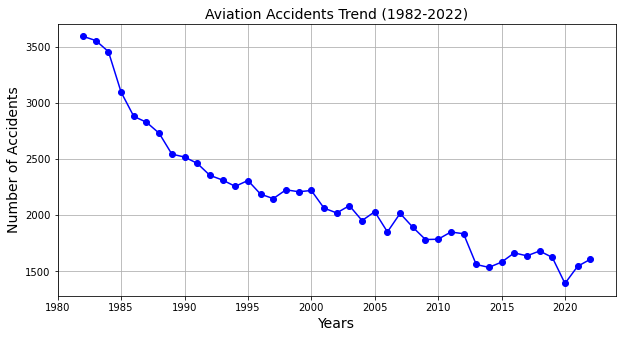

In [28]:
# Convert Event.Date from string to datetime format
df_cleaned["Event.Date"] = pd.to_datetime(df_cleaned["Event.Date"])

# Count accidents per year
accidents_per_year = df_cleaned["Event.Date"].dt.year.value_counts().sort_index()

# Filter data from 1982 onward
accidents_per_year = accidents_per_year[accidents_per_year.index >= 1982]

# Plot line graph
plt.figure(figsize=(10, 5))
plt.plot(accidents_per_year.index, accidents_per_year.values, marker="o", linestyle="-", color="blue")

plt.xlabel("Years",fontsize = 14)
plt.ylabel("Number of Accidents",fontsize = 14)
plt.title("Aviation Accidents Trend (1982-2022)",fontsize = 14)  # Fixed the title
plt.grid(True)
plt.show()


### Summary of Insights from the Aviation Accident Trend (1982-2022)
- Declining Trend: Aviation accidents have significantly decreased from the 1980s to the 2000s due to improved aircraft technology, stricter regulations, and better training.

- Stable Period: From 2000-2015, accidents remained relatively stable, indicating a plateau in safety improvements.

- COVID-19 Impact: A sharp decline in 2020 due to reduced flights, followed by a slight rise post-2020 as air travel resumed.